In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data=pd.read_csv("CarPriceprediction.csv")

In [3]:
data.head

<bound method NDFrame.head of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible     

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Handeling missing values

In [7]:
data.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
data.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [9]:
data.CarName.nunique()

147

## Univarient analysis

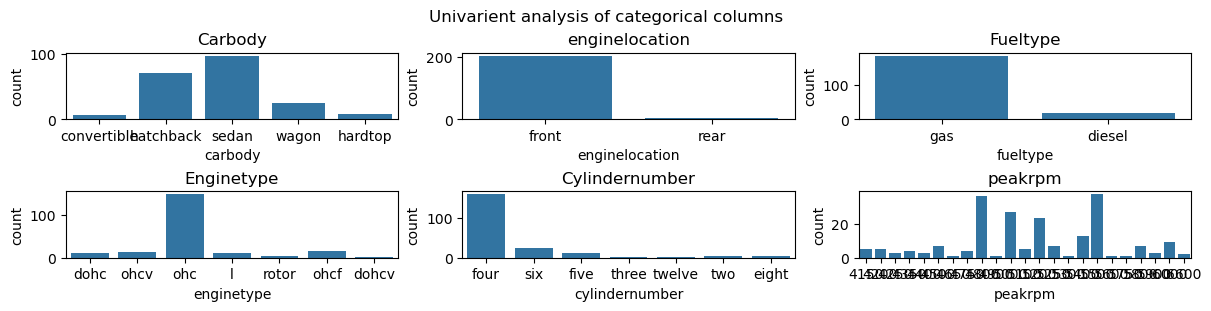

In [11]:
fig,axs=plt.subplots(2,3,figsize=(12,3),constrained_layout=True)
fig.suptitle("Univarient analysis of categorical columns")

axs[0, 0].set_title("Carbody")
sns.countplot(data=data, x="carbody", ax=axs[0, 0])

axs[0, 1].set_title("enginelocation")
sns.countplot(data=data, x="enginelocation", ax=axs[0, 1])

axs[0, 2].set_title("Fueltype")
sns.countplot(data=data, x="fueltype", ax=axs[0, 2])

axs[1, 0].set_title("Enginetype")
sns.countplot(data=data, x="enginetype", ax=axs[1, 0])

axs[1, 1].set_title("Cylindernumber")
sns.countplot(data=data, x="cylindernumber", ax=axs[1, 1])

axs[1, 2].set_title("peakrpm")
sns.countplot(data=data, x="peakrpm", ax=axs[1, 2])

plt.show()

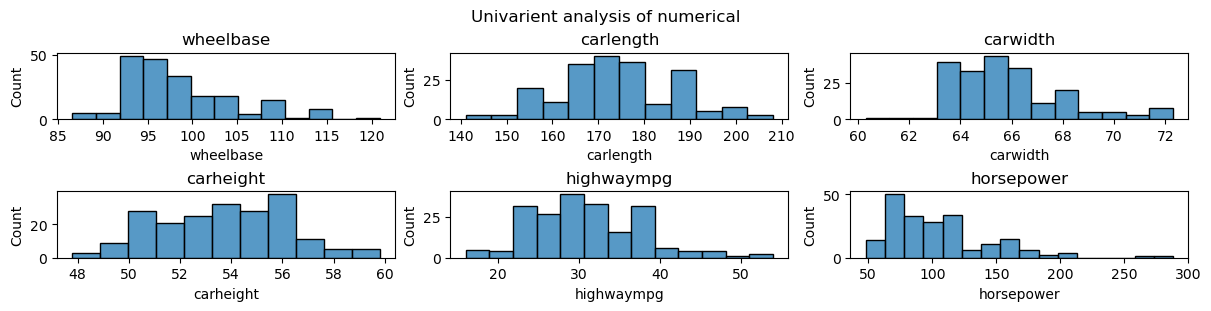

In [12]:
fig,axs= plt.subplots(2,3,figsize=(12,3),constrained_layout=True)
fig.suptitle("Univarient analysis of numerical")

axs[0,0].set_title("wheelbase")
sns.histplot(data=data,x="wheelbase",ax=axs[0,0])

axs[0,1].set_title("carlength")
sns.histplot(data=data,x="carlength",ax=axs[0,1])

axs[0,2].set_title("carwidth")
sns.histplot(data=data,x="carwidth",ax=axs[0,2])

axs[1,0].set_title("carheight")
sns.histplot(data=data,x="carheight",ax=axs[1,0])

axs[1,1].set_title("highwaympg")
sns.histplot(data=data,x="highwaympg",ax=axs[1,1])

axs[1,2].set_title("horsepower")
sns.histplot(data=data,x="horsepower",ax=axs[1,2])

plt.show()

## Bivarient analysis 

<Axes: title={'center': 'Cylindernumber vs price'}, xlabel='cylindernumber', ylabel='price'>

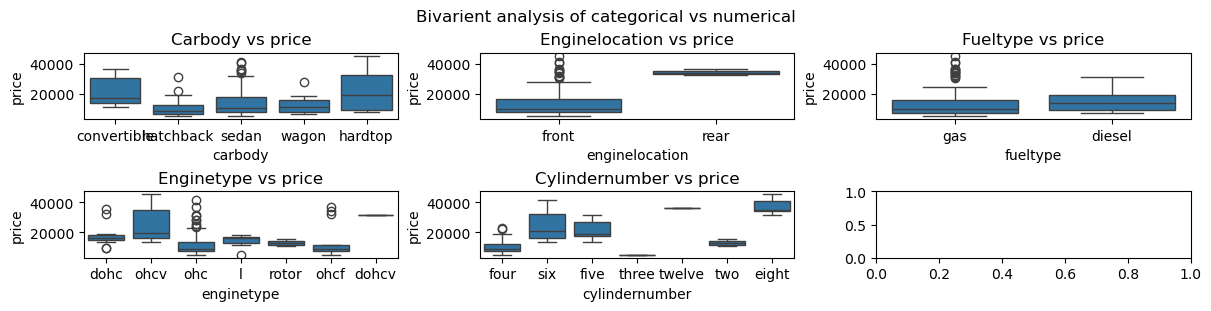

In [14]:
fig,axs= plt.subplots(2,3,figsize=(12,3),constrained_layout=True)
fig.suptitle("Bivarient analysis of categorical vs numerical")

axs[0,0].set_title("Carbody vs price")
sns.boxplot(data=data,x="carbody",y="price",ax=axs[0,0])

axs[0,1].set_title("Enginelocation vs price")
sns.boxplot(data=data,x="enginelocation",y="price",ax=axs[0,1])

axs[0,2].set_title("Fueltype vs price")
sns.boxplot(data=data,x="fueltype",y="price",ax=axs[0,2]) 

axs[1,0].set_title("Enginetype vs price")
sns.boxplot(data=data,x="enginetype",y="price",ax=axs[1,0])

axs[1,1].set_title("Cylindernumber vs price")
sns.boxplot(data=data,x="cylindernumber",y="price",ax=axs[1,1])


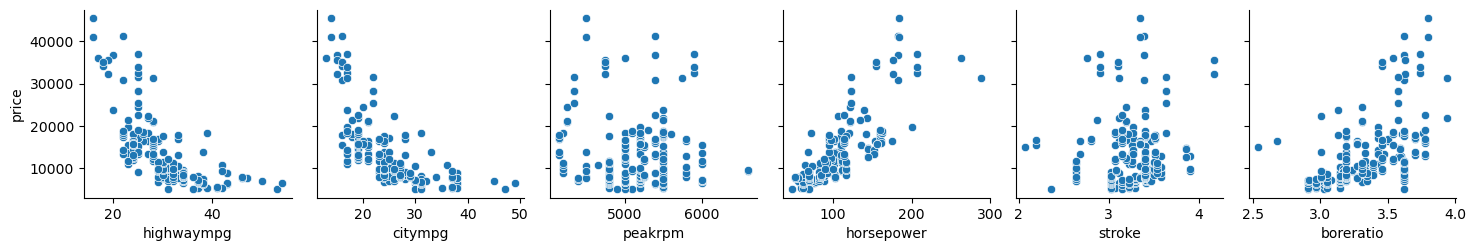

In [15]:
sns.pairplot(data=data,x_vars=["highwaympg","citympg","peakrpm","horsepower","stroke","boreratio"],y_vars="price")

## Model building


In [17]:
new_data=data.drop(['CarName', 'car_ID','fueltype', 'aspiration', 'doornumber','carbody', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'symboling', 'wheelbase', 'carlength','carheight','stroke', 'boreratio','compressionratio'], axis=1)

In [18]:
new_data

,drivewheel,carwidth,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,price
0,rwd,64.1,2548,130,111,5000,21,27,13495.0
1,rwd,64.1,2548,130,111,5000,21,27,16500.0
2,rwd,65.5,2823,152,154,5000,19,26,16500.0
3,fwd,66.2,2337,109,102,5500,24,30,13950.0
4,4wd,66.4,2824,136,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...
200,rwd,68.9,2952,141,114,5400,23,28,16845.0
201,rwd,68.8,3049,141,160,5300,19,25,19045.0
202,rwd,68.9,3012,173,134,5500,18,23,21485.0
203,rwd,68.9,3217,145,106,4800,26,27,22470.0


In [19]:
# label encoding 

In [20]:
from sklearn.preprocessing import LabelEncoder

cat_columns = [
    'drivewheel'
]

le = LabelEncoder()

for col in cat_columns:
    new_data[col] = le.fit_transform(new_data[col])

new_data.head()


,drivewheel,carwidth,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,price
0,2,64.1,2548,130,111,5000,21,27,13495.0
1,2,64.1,2548,130,111,5000,21,27,16500.0
2,2,65.5,2823,152,154,5000,19,26,16500.0
3,1,66.2,2337,109,102,5500,24,30,13950.0
4,0,66.4,2824,136,115,5500,18,22,17450.0


## Selecting target variables

In [92]:
x = new_data.drop('price', axis=1)
y = new_data['price']
x,y

(     drivewheel  carwidth  curbweight  enginesize  horsepower  peakrpm  \
 0             2      64.1        2548         130         111     5000   
 1             2      64.1        2548         130         111     5000   
 2             2      65.5        2823         152         154     5000   
 3             1      66.2        2337         109         102     5500   
 4             0      66.4        2824         136         115     5500   
 ..          ...       ...         ...         ...         ...      ...   
 200           2      68.9        2952         141         114     5400   
 201           2      68.8        3049         141         160     5300   
 202           2      68.9        3012         173         134     5500   
 203           2      68.9        3217         145         106     4800   
 204           2      68.9        3062         141         114     5400   
 
      citympg  highwaympg  
 0         21          27  
 1         21          27  
 2         19 

## Training and testing of data

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)


In [90]:
x_scaled

array([[ 1.21333041, -0.84478235, -0.01456628, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [ 1.21333041, -0.84478235, -0.01456628, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [ 1.21333041, -0.19056612,  0.51488192, ..., -0.26296022,
        -0.95301169, -0.69162706],
       ...,
       [ 1.21333041,  1.39824472,  0.87875722, ...,  0.78785546,
        -1.10624102, -1.12833203],
       [ 1.21333041,  1.39824472,  1.27343679, ..., -0.68328649,
         0.11959362, -0.54605874],
       [ 1.21333041,  1.39824472,  0.97502053, ...,  0.57769233,
        -0.95301169, -0.83719538]])

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=3)

In [26]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(164, 8) (164,)
(41, 8) (41,)


In [27]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

## Making model predictions

In [29]:
y_train_pred = LR.predict(x_train)
y_test_pred = LR.predict(x_test)

In [30]:
from sklearn.metrics import r2_score

In [31]:
train_score=r2_score(y_train,y_train_pred)
train_score

0.8198809885279811

In [32]:
test_score=r2_score(y_test,y_test_pred)
test_score

0.8529055427863976

## Plotting the predictions

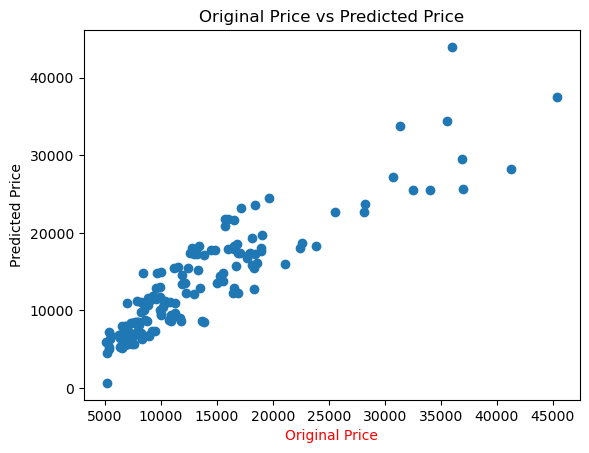

In [34]:
plt.scatter(y_train, y_train_pred)
plt.title("Original Price vs Predicted Price")
plt.xlabel("Original Price",color="red")
plt.ylabel("Predicted Price")
plt.show()

## Model building :- Random forest Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=140,           
    max_depth=10,                
    min_samples_split=12,       
    min_samples_leaf=4,         
    random_state=2               
)
rf.fit(x_train, y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)
print(f'Train R2 score: {train_score}')
print(f'Test R2 score: {test_score}')

Train R2 score: 0.9339037644701756
Test R2 score: 0.9189991888421507


## Model building:- Decision tree

In [96]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=10, random_state=5)
dt_reg.fit(x_train, y_train)
y_train_pred = dt_reg.predict(x_train)
y_test_pred = dt_reg.predict(x_test)
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)
print(f'Decision Tree Train R2 score: {train_score}')
print(f'Decision Tree Test R2 score: {test_score}')

Decision Tree Train R2 score: 0.997136156873959
Decision Tree Test R2 score: 0.9049613517668422


## Model building:- SVR

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=7, scoring='r2')

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV R² score:", grid_search.best_score_)

Best parameters: {'C': 100, 'epsilon': 0.01, 'kernel': 'linear'}
Best CV R² score: 0.6915889172132436


## Model building :- KNN regressor

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn_regressor.fit(x_train, y_train)

y_train_pred = knn_regressor.predict(x_train)

y_test_pred = knn_regressor.predict(x_test)

r2_train = r2_score(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)

print(f'R-squared score on training data: {r2_train:.4f}')
print(f'R-squared score on test data: {r2_test:.2f}')


R-squared score on training data: 0.8928
R-squared score on test data: 0.89


## Model building :- xg boost regressor

In [44]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [45]:
import xgboost as xgb
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10
}

# Train XGBoost model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on both train and test sets
y_train_pred = model.predict(dtrain)
y_test_pred = model.predict(dtest)

# Calculate R2 scores for both train and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE for test set (optional, but often useful)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f'R-squared (Train): {r2_train:.4f}')
print(f'R-squared (Test): {r2_test:.4f}')
print(f'Root Mean Squared Error (Test): {rmse_test:.4f}')

R-squared (Train): 0.9926
R-squared (Test): 0.9402
Root Mean Squared Error (Test): 2222.1611


In [122]:
input_data = np.array([2,66.4,2564,150,160,5400,24,29]).reshape(1, 8)
scaled_data = scaler.transform(input_data)
prediction = rf.predict(scaled_data)
print(prediction)

[14388.5447925]


C:\Users\saraf\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [120]:
input_data = np.array([1,64.24,2558,150,140,5300,24,29]).reshape(1, 8)
scaled_data = scaler.transform(input_data)
prediction = rf.predict(scaled_data)
print(prediction)

[13120.62714794]


C:\Users\saraf\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [110]:
import pickle 
pickle.dump(rf,open('model.pkl','wb'))

In [112]:
knn_regressor.predict(np.array([2,66.4,2564,150,160,5400,24,29]).reshape(1,8))

array([28904.5])

In [114]:
knn_regressor.predict(np.array([0,58.4,2164,100,110,5000,24,29]).reshape(1,8))

array([28904.5])

In [116]:
new_data

,drivewheel,carwidth,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,price
0,2,64.1,2548,130,111,5000,21,27,13495.0
1,2,64.1,2548,130,111,5000,21,27,16500.0
2,2,65.5,2823,152,154,5000,19,26,16500.0
3,1,66.2,2337,109,102,5500,24,30,13950.0
4,0,66.4,2824,136,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...
200,2,68.9,2952,141,114,5400,23,28,16845.0
201,2,68.8,3049,141,160,5300,19,25,19045.0
202,2,68.9,3012,173,134,5500,18,23,21485.0
203,2,68.9,3217,145,106,4800,26,27,22470.0
